# Introduction

## The Ising Model
The Ising model is a mathematical model used to describe the behavior of a system of interacting spins. The two-dimensional Ising model (2D Ising model) is a specific case of the Ising model, where the spins are arranged on a 2D lattice. The Ising model is named after the physicist Ernst Ising, who first introduced it in his PhD thesis in 1925. The 2D Ising model is one of the simplest models of a phase transition and has been used to study a wide range of phenomena in physics, materials science, and computer science.

The 2D Ising model is a fundamental model in statistical mechanics and has been used to study a wide range of phenomena, such as critical phenomena, phase transitions, and the behavior of magnets. It is also a challenging problem for computational methods and has been used to test and develop new algorithms for simulating complex systems.

## Use of MCMC for solving Ising Model
Markov Chain Monte Carlo (MCMC) methods, such as the Metropolis-Hastings algorithm, are often used to generate samples from the target probability distribution defined by the Ising model. MCMC methods are useful for simulating the 2D Ising model because they can handle complex systems with many interacting particles and can efficiently explore the state space of the system.

# Objective of the Project

There are two major objectives of this project and they are
    
    i. To simulate the interaction of particles at different 
    temperatures to find the critical temperature
    ii. To simulate the interaction of particles at different 
    temeprature and see how they behave with respect to time 

# Working Methodology

## The Ising Hamiltonian

Hamiltonian function (Hamiltonian) of a system specifies its total energy. It is given by
$$ 
\mathcal{H} = -J \sum_{\langle i j \rangle} S_{i} S_{j}.  
$$

* The spins $S_{i}$ can take values $\pm 1$,
*  $\langle i j \rangle$ implies nearest-neighbor interaction only, 
* $J>0$ is the strength of exchange interaction.

## The Algorithm Used

The Monte Carlo Simulation of 2D Ising model according to Metropolis-Hastings algorithm. The major steps of the algorithm are


1. Generate a initial spin configuration randomly. Use +1 as sping up and -1 as spin down
2. Choose a spin at random 
3. Calculate energy (E_old)
4. Flip the spin
5. Calculate new energy (E_new)
6. If (E_new<E_old) accept the flip and go to step 2 for another step else go to step 7
7. Find en = ((E_new-Eold)/T) and generate random number between 0 and 1 say (r)
8. Accept the flip if r>en else do not flip
9. Go to step 2 (Until Converges)

## Tools Used

For the implementation of the algorithm following tools are used

1. Python programming Language: Language of choice for implementing the algorithm 
2. Numpy
2. Matplotlib
3. Jupyter Notebook

# Result and Discussion

## The Initial Configuration

As mentoined in the algorithm, an initial spin configuration `10x10` lattice is created. The Figure 1 shows the intial configuration

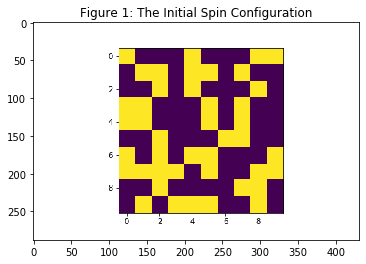

In [7]:
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

img = mpimg.imread('initial.png')
imgplot = plt.imshow(img)
plt.title("Figure 1: The Initial Spin Configuration")
plt.show()

## Result after simulation

After simulating 5 temperature points, energy and magnetization are plotted against temperature. The result is shown in figure 2 and 3.

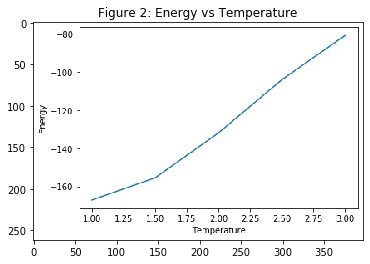

In [8]:
img = mpimg.imread('multi_eng.png')
imgplot = plt.imshow(img)
plt.title("Figure 2: Energy vs Temperature")
plt.show()

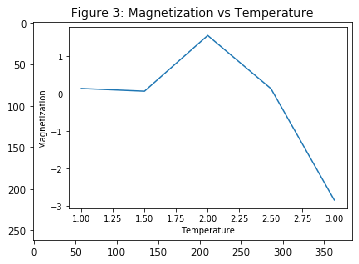

In [10]:
img = mpimg.imread('multi_mag.png')
imgplot = plt.imshow(img)
plt.title("Figure 3: Magnetization vs Temperature")
plt.show()

In Figure 3, we can see that there is a sharp change at temperature 1.50, this can be further investegated for critical point

The spin configuration after 10000 steps for `temperature=1` is given in figure 4

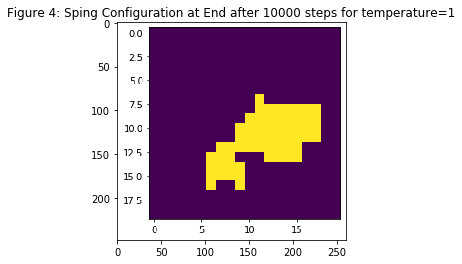

In [11]:
img = mpimg.imread('temp1.png')
imgplot = plt.imshow(img)
plt.title("Figure 4: Sping Configuration at End after 10000 steps for temperature=1")
plt.show()

The spin configuration at different time for `temperature=2` is given in figure 5

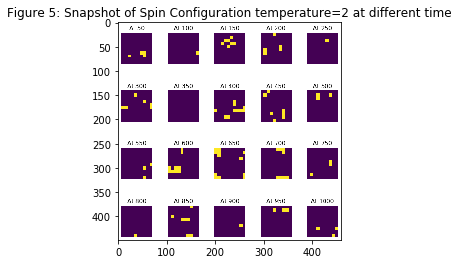

In [12]:
img = mpimg.imread('multi_point.png')
imgplot = plt.imshow(img)
plt.title("Figure 5: Snapshot of Spin Configuration temperature=2 at different time")
plt.show()

# Conclusion

In this project, Metropolish-Hasting algorithm is sucessfully implemented for solving 2D Ising Model, also the critical temperature for given initial spin configuration is calculated.

# Appendix

The Code Used for this project is 
```
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

def init_state(grid_size=10):
    """
    This Function intalizes the state for random configuration
    """
    spins = np.random.choice([-1, 1], size=(grid_size, grid_size))  # random initial configuration of spins
    return spins

def calc_energy(spins):
    """
    Compute the Energy of the given spin configuration
    """
    energy = 0.0
    for i in range(grid_size):
        for j in range(grid_size):
            energy-= spins[i, j] * (spins[i, (j+1)%grid_size] + spins[(i+1)%grid_size, j])
    return energy
    
def calc_magnetization(spins):
    """
    Calculates the Magnetization of given configuration
    """
    return np.sum(spins)
    
def perform_simulation(n_steps, temperature, spins, grid_size):
    """
    Run the Simulation
    """
    # Run the Metropolis-Hastings algorithm
    for step in range(n_steps):
        # Choose a random spin
        i = np.random.randint(grid_size)
        j = np.random.randint(grid_size)
        # Calculate the energy of the current configuration
        E_old = calc_energy(spins)
        # Flip the chosen spin
        spins[i, j] = -spins[i, j]
        # Calculate the energy of the new configuration
        E_new = calc_energy(spins)
        # Accept or reject the flip
        if E_new >= E_old:
            # Calculate acceptance probability
            en = E_new - E_old
            p = np.exp(-en / temperature)

            # Generate a random number and accept the flip if p > r
            r = np.random.rand()
            if r > p:
                spins[i, j] = -spins[i, j]
    return spins
    
n_steps=1000
temperature=1
grid_size=10
init_config=init_state(grid_size=grid_size)

plt.imshow(init_config)
plt.savefig('initial.png')
plt.show()

# Define the grid size and the number of steps
grid_size = 10
n_steps = 1000

# Define the range of temperatures to simulate
temperature_range = np.linspace(1, 3, 5)

# Initialize lists to store the energy and magnetization
energy_list = []
magnetization_list = []

# Run the simulation for each temperature
for temperature in temperature_range:
    energy = 0.0
    magnetization = 0.0
    for i in range(n_steps):
        spins = init_state(grid_size)
        spins = perform_simulation(n_steps, temperature, spins, grid_size)
        energy += calc_energy(spins)
        magnetization += calc_magnetization(spins)
    energy_list.append(energy / n_steps)
    magnetization_list.append(magnetization / n_steps)

# Plot the energy and magnetization as a function of temperature
plt.plot(temperature_range, energy_list)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.show()

plt.plot(temperature_range, magnetization_list)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

# Define the grid size and the number of steps
import matplotlib.gridspec as gridspec
grid_size = 10
n_steps = 1000

# Define the temperature
temperature = 2

# Initialize a list to store the spin configurations at different times
spins_list = []

# Create a counter variable
count = 0

# Run the simulation
spins = init_state(grid_size)
for step in range(n_steps):
    spins = perform_simulation(n_steps, temperature, spins, grid_size)
    count += 1
    if count % 50 == 0:
        spins_list.append(spins.copy())

# Set the number of rows and columns for the grid
n_rows = 4
n_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,8))

# Flatten the axes array
axes = axes.ravel()

# Iterate over the spin configurations
for i, spins in enumerate(spins_list):
    axes[i].imshow(spins)
    axes[i].set_title(f'At {(i*50)+50}')
    # remove the axis labels and ticks
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
```